In [1]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

from corextopic import corextopic as ct
from corextopic import vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [2]:
# Get 20 newsgroups data
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [3]:

# Transform 20 newsgroup data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(newsgroups.data)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words



(11314, 20000)

In [4]:


# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))



In [5]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(11314, 19038)

In [6]:
# Train the CorEx topic model with 50 topics
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words)

In [10]:


# Print a single topic from CorEx topic model
topic_model.get_topics(topic=1, n_words=10)
# print index not word
topic_model.get_topics(topic=5, n_words=10, print_words=False)



[(1336, 0.0371975197994687),
 (1335, 0.036085671214458714),
 (11448, 0.03531603719362219),
 (8968, 0.0307598156715162),
 (1306, 0.02912652227812319),
 (13303, 0.02777130708553819),
 (13051, 0.027594397620736913),
 (15437, 0.026729063880313424),
 (16092, 0.026121923976611183),
 (1334, 0.02589034185082472)]

In [8]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: dsl,n3jxp,chastity,cadre,geb,shameful,intellect,skepticism,banks,pitt
1: team,game,season,players,league,play,hockey,games,teams,nhl
2: government,law,public,rights,state,encryption,clipper,federal,security,secure
3: god,jesus,bible,christians,christian,christ,religion,jews,church,faith
4: people,say,fact,point,believe,person,saying,world,reason,mean
5: armenians,armenian,national,international,argic,press,policy,serdar,soviet,armenia
6: file,program,window,directory,ftp,pub,server,application,unix,available
7: based,issue,sense,clear,truth,subject,certain,known,particular,existence
8: cs,ma,au,gmt,cc,uu,id,sites,fi,host
9: windows,software,card,thanks,pc,dos,files,disk,advance,ram
10: drive,sale,scsi,controller,board,shipping,ide,drives,cd,bus
11: pitching,hit,staff,braves,runs,hitter,nl,smith,hr,baltimore
12: just,don,like,time,going,right,better,let,come,didn
13: archive,various,document,related,addition,modified,published,contents,complete,distributed
14: information,internet,un

In [9]:
topic_model.get_topics(topic=5, n_words=10, print_words=False)

[(1336, 0.0371975197994687),
 (1335, 0.036085671214458714),
 (11448, 0.03531603719362219),
 (8968, 0.0307598156715162),
 (1306, 0.02912652227812319),
 (13303, 0.02777130708553819),
 (13051, 0.027594397620736913),
 (15437, 0.026729063880313424),
 (16092, 0.026121923976611183),
 (1334, 0.02589034185082472)]

In [11]:
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[ 8  9 38 ... 37  0  0]
(19038,)


In [12]:
# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=0, n_docs=10, sort_by='log_prob')

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


[(3097, 0.0),
 (2350, 0.0),
 (105, 0.0),
 (3864, 0.0),
 (9396, 0.0),
 (11229, 0.0),
 (6440, 0.0),
 (6437, 0.0),
 (2284, 0.0),
 (8445, 0.0)]

In [13]:
topic_model.tc

44.54780845491073

In [14]:
topic_model.tcs.shape # k_topics

(50,)

In [15]:


print(np.sum(topic_model.tcs))
print(topic_model.tc)



44.54780845491073
44.54780845491073


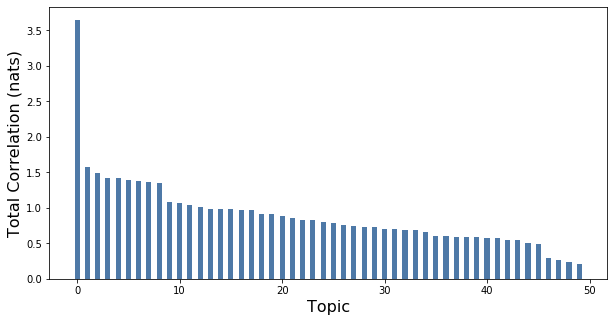

In [16]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [17]:
topic_model.log_z.shape # n_docs x k_topics

(11314, 50)

In [19]:
print(np.mean(topic_model.log_z, axis=0))

[3.64813418 1.57958569 1.48835238 1.42639341 1.42043661 1.39232446
 1.37222362 1.36535367 1.34334261 1.08793513 1.06264005 1.03767991
 1.01780633 0.98444346 0.98350034 0.97751588 0.97425574 0.96560217
 0.9170467  0.91160502 0.87920818 0.86341492 0.83259909 0.82311403
 0.79730235 0.78507652 0.76449939 0.74186846 0.73348486 0.7232203
 0.70714498 0.70407292 0.6876558  0.68271949 0.66403509 0.60590956
 0.59919508 0.58802044 0.5869777  0.58426131 0.57613847 0.57032326
 0.5434933  0.54324576 0.504955   0.48664151 0.28893956 0.27183877
 0.24173114 0.21054385]


In [20]:
print(topic_model.tcs)

[3.64813418 1.57958569 1.48835238 1.42639341 1.42043661 1.39232446
 1.37222362 1.36535367 1.34334261 1.08793513 1.06264005 1.03767991
 1.01780633 0.98444346 0.98350034 0.97751588 0.97425574 0.96560217
 0.9170467  0.91160502 0.87920818 0.86341492 0.83259909 0.82311403
 0.79730235 0.78507652 0.76449939 0.74186846 0.73348486 0.7232203
 0.70714498 0.70407292 0.6876558  0.68271949 0.66403509 0.60590956
 0.59919508 0.58802044 0.5869777  0.58426131 0.57613847 0.57032326
 0.5434933  0.54324576 0.504955   0.48664151 0.28893956 0.27183877
 0.24173114 0.21054385]


In [21]:

# Train a second layer to the topic model
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels);

# Train a third layer to the topic model
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels);

In [22]:
vt.vis_hierarchy([topic_model, tm_layer2, tm_layer3], column_label=words, max_edges=200, prefix='topic-model-example')

weight threshold is 0.000000 for graph with max of 200.000000 edges 
non-isolated nodes,edges 59 61
non-isolated nodes,edges 59 58
Couldn't find 'force.html' file for visualizing d3 output


In [23]:
# Anchor one word to the first topic
anchor_words = ['nasa']

In [24]:
# Anchor the word 'nasa' to the first topic
anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);

In [25]:
topic_words,_ = zip(*anchored_topic_model.get_topics(topic=0))
print('0: ' + ','.join(topic_words))

0: nasa,gov,ames,institute,jpl,station,propulsion,jsc,arc,shafer


In [26]:


# Anchor 'nasa' and 'space' to first topic, 'sports' and 'stadium' to second topic, so on...
anchor_words = [['nasa', 'space'], ['sports', 'stadium'], ['politics', 'government'], ['love', 'hope']]

anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);



In [27]:
for n in range(len(anchor_words)):
    topic_words,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ','.join(topic_words))

0: space,nasa,orbit,moon,shuttle,launch,gov,earth,lunar,ames
1: sports,stadium,april,san,city,los,york,washington,angeles,center
2: government,politics,state,rights,law,war,country,military,public,security
3: hope,love,helps,relates,virile,tatoos,sustaining,whosoever,weird,allegory


In [28]:
# Anchor with single words and groups of words
anchor_words = ['nasa', ['nasa', 'politics'], ['nasa', 'news'], 'war']

anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);

In [29]:
for n in range(len(anchor_words)):
    topic_words,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ','.join(topic_words))

0: nasa,space,orbit,launch,shuttle,moon,earth,lunar,satellite,commercial
1: nasa,politics,research,gov,science,scientific,institute,organization,studies,providing
2: news,nasa,insisting,edwards,hal,llnl,cso,cfv,nodak,admin
3: war,israel,armenians,armenian,israeli,jews,soldiers,military,killed,history
